In [106]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import pandas as pd

In [107]:
data = pd.read_csv('../files/customer_data_records.csv')

print(data.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90


In [108]:
x= data.iloc[:,[1,2]].values # selecting the first two columns for clustering

In [109]:
# feature scaling - it is to scale the feature before clustereing
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler() # create standard scaler object
x = scaler.fit_transform(x) # fit and transform the data

In [110]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11): # testing from 1 to 10 clusters
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x) # fit the model to the data the closest cluster center
    wcss.append(kmeans.inertia_)  # inertia is the sum of squared distances to

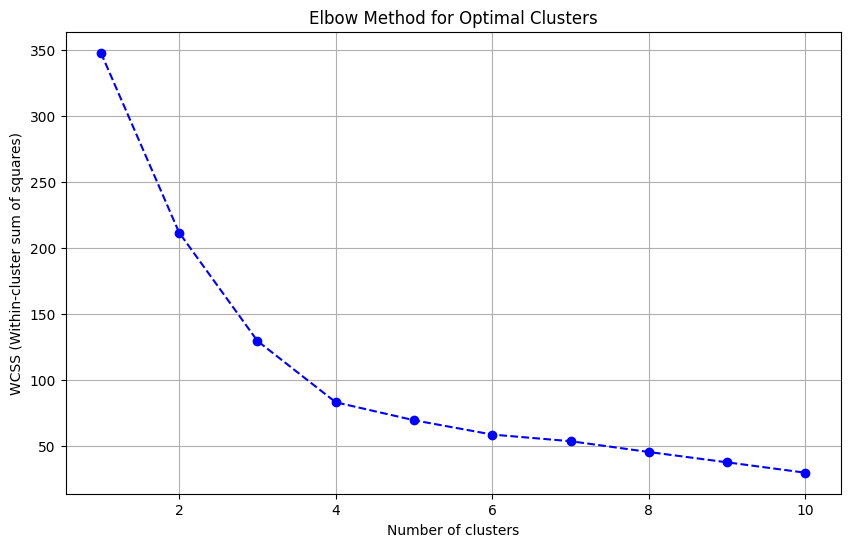

In [111]:
#plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss , marker='o', linestyle='--', color='blue')  # line plot with markers
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()


In [112]:
# base on the elbow method, we can see that the optimal number of clusters is 5
optimal_clusters = 5

# Applying KMeans clustering with the optimal number of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)# create KMeans object with optimal clusters
y_kmeans = kmeans.fit_predict(x)  # fit the model


In [113]:
# applying the k-means with the optimal clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)  # fit the model and predict the clusters

In [114]:
# adding the cluster labels to the original data
data['Cluster'] = y_kmeans #Create a new column in the DataFrame for cluster labels

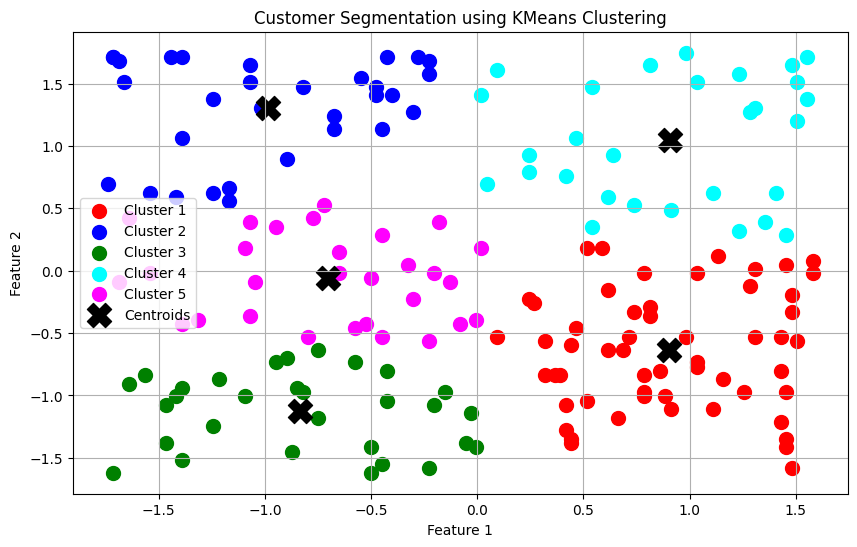

In [115]:
# visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids', marker='X')
plt.title('Customer Segmentation using KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()